     con: array([], dtype=float64)
     fun: -76000.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 0., 20.])
  status: 0
 success: True
       x: array([20., 80.])


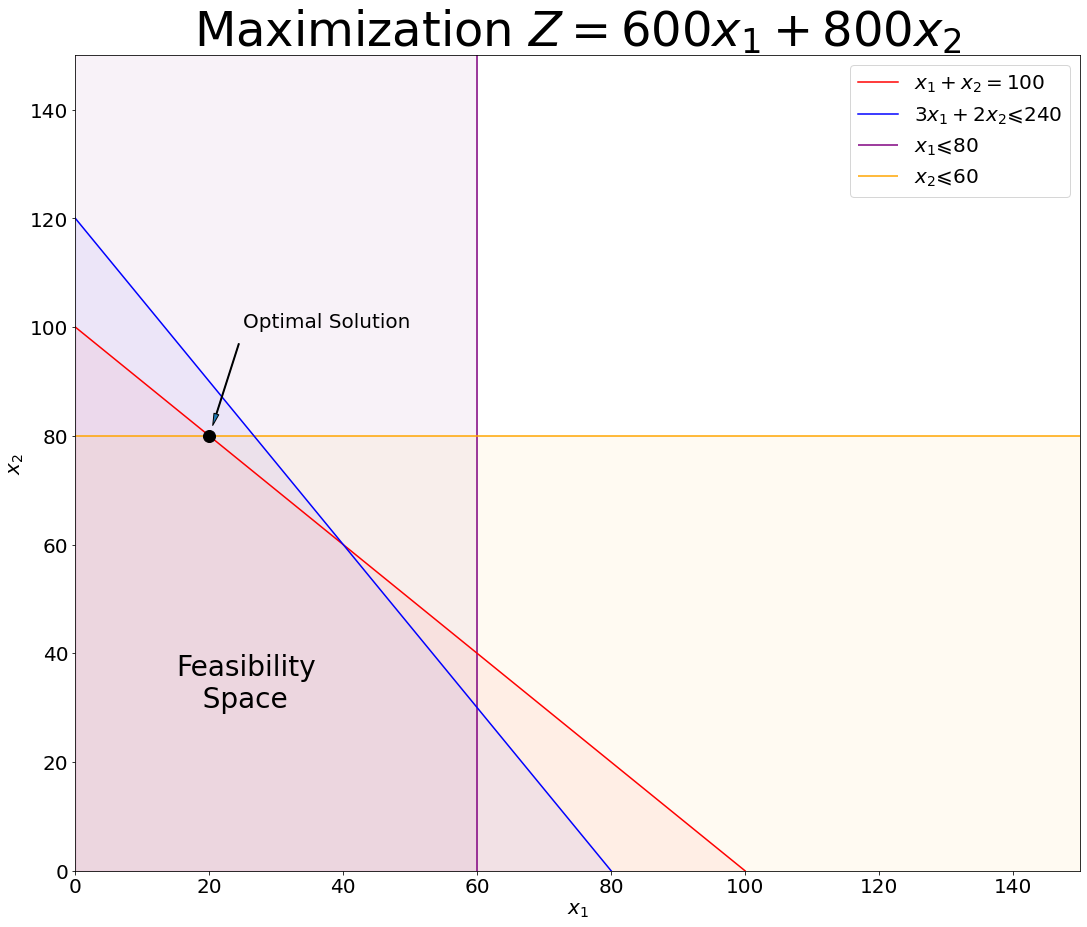

In [1]:
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import numpy as np

opt = [-600,-800]
lhs = [[1,1],[3,2]]
bnd =[[None,60],[None,80]]
rhs = [100,240]


opt = linprog(c=opt, A_ub=lhs, b_ub=rhs,bounds=bnd, method='revised simplex')

print(opt)


plt.figure(figsize = (18,15))
plt.rcParams["font.size"] = 20
plt.axis([0, 150, 0, 150])

#Constrain (1)
x2 = np.array([0,200]); x1 = 100 - x2
plt.plot(x1, x2, "red", label = "$x_1 + x_2 = 100$")
plt.fill_between([0, 100], [100,0], color = "red", alpha = 0.05)

#Constrain (2)
x2 = np.array([0,200]); x1 = (240 - 2*x2)/3
plt.plot(x1, x2, "blue", label = "$3x_1 + 2x_2 \leqslant 240$")
plt.fill_between([0, 80], [120,0], color = "blue", alpha = 0.05)

#Bound (1)
plt.vlines(60,0,150,color='purple', label ="$x_1\leqslant 80 $")
plt.fill_between([60,0], [150,150], color = "purple", alpha = 0.05)

#Bound (2)
plt.hlines(80, 0,150,color='orange', label ="$x_2\leqslant 60 $")
plt.fill_between([150,0], [80,80], color = "orange", alpha = 0.05)


#Indicate optimal product strategy
plt.plot(20,80, marker = "o", color = "black", markersize= 12)
plt.annotate("Optimal Solution", xy = (20,80), xytext = (25,100),arrowprops = dict(shrink =.1, width = 1,headwidth = 5))


#Indicate feasibility space

plt.text(15, 30, "Feasibility\n   Space", fontdict = {"size":"28"})
plt.xlabel("$x_1$"); plt.ylabel("$x_2$")

plt.title("Maximization $Z = 600x_1 + 800x_2$", fontdict = {"size":"48"})

plt.legend()
plt.show()